# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Important Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [4]:
# Import Warnings.
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Dataset

In [6]:
data = pd.read_csv('day.csv')
pd.set_option('display.max_columns', None)

In [7]:
# Top 5 rows of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
data.shape

(730, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Checking for the null values in column data.

data.isnull().sum().sort_values(ascending=False)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# Check the columns of data. 

data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
# Check the size of data. 

data.size

11680

In [14]:
# Check the datatypes of data.

data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Observations
- There are 730 rows and 16 columns in the data set. 
- There are no null values in any of the columns or duplicated values.
- "dteday" column is object and rest columns are float or integer.
- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

# Data Cleaning

- Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:
- `instant` : Its only an index value, so as it's unique we can remove it
- `dteday`: This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could deleted this column.
- `casual` and `registered`: Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

#### Renameing some columns

In [19]:
data.rename({'dteday':'date','yr':'year','mnth':'month','weathersit':'weather','atemp':'feel_temp','cnt':'total'},axis=1,inplace=True)

In [20]:
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,casual,registered,total
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Droping the irrelevant columns

In [22]:
irr_col = ['instant','date','casual','registered']
data = data.drop(irr_col,axis=1)

- In data instant column is just like a seriel number which is not required for the analysis
- date is a date column, this column is not required because we have saperate column for the year and month in the data
- similarly total column contains the value (casual + registered )

#### Fixing the rows and columns

#### season
- 1 - spring
- 2 - summer
- 3 - fall
- 4 - winter

#### month 1-12
- jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec

#### weekday 0-6
- sun, mon, tues, wed, thu, fri, sat

#### weather
- 1 - clear
- 2 - cloudy
- 3 - light snow
- 4 - heavy rain

## Data Visualisation

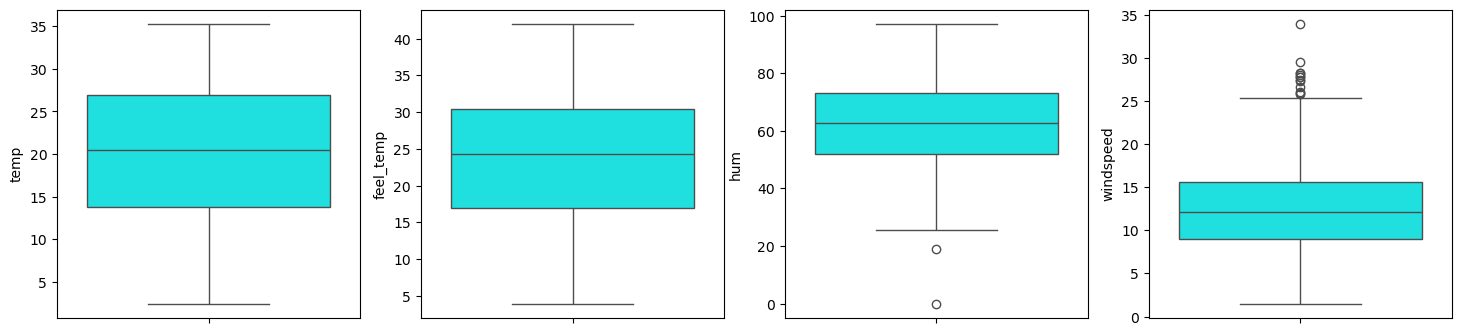

In [30]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'feel_temp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data,orient='v',color='cyan')
    i+=1

#### From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set¶


Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

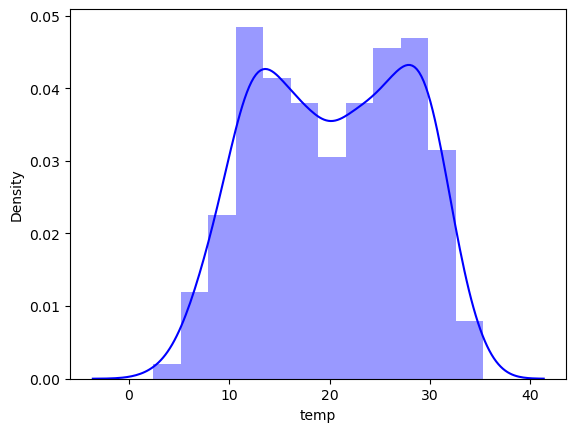

In [239]:
# temperature
sns.distplot(data['temp'],color='blue')
plt.show()

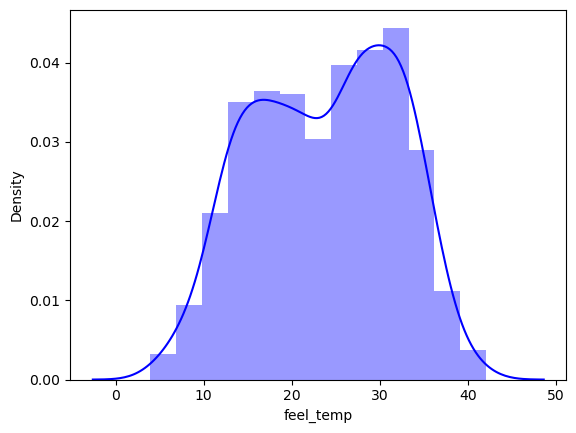

In [241]:
# feeling temperature
sns.distplot(data['feel_temp'],color='blue')
plt.show()

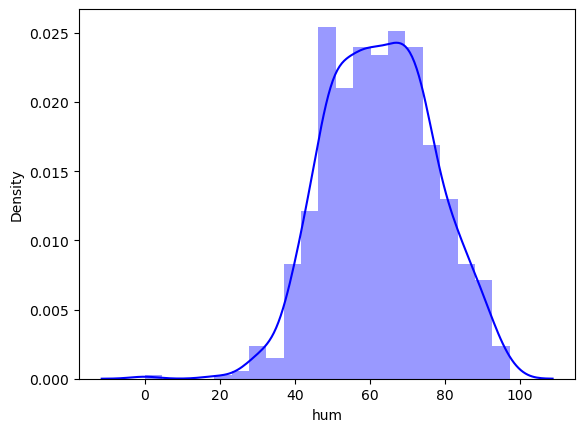

In [243]:
# humidity
sns.distplot(data['hum'],color='blue')
plt.show()

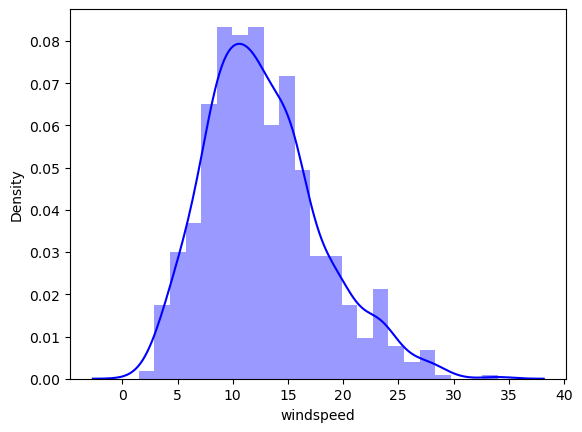

In [245]:
# wind speed
sns.distplot(data['windspeed'],color='blue')
plt.show()

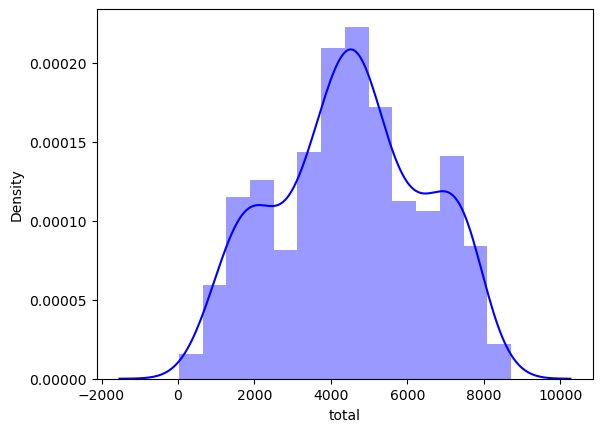

In [247]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(data['total'],color='blue')
plt.show()

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [32]:
data.season.replace([1,2,3,4],['spring','summer','fall','winter'],inplace=True)

In [33]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
data['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [34]:
data.weather.replace([1,2,3,4],['clear','cloudy','light snow','heavy rain'],inplace=True)

In [35]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weather
data['weather'].value_counts()

weather
clear         463
cloudy        246
light snow     21
Name: count, dtype: int64

In [36]:
data.weekday.replace([0,1,2,3,4,5,6],['sun', 'mon', 'tues', 'wed', 'thu','fri', 'sat'],inplace=True)

In [37]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekday
data['weekday'].value_counts()

weekday
mon     105
tues    105
wed     104
thu     104
fri     104
sat     104
sun     104
Name: count, dtype: int64

In [38]:
data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12],['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],inplace=True)

In [39]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
data['month'].value_counts()

month
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: count, dtype: int64

In [40]:
data.head()

,season,year,month,holiday,weekday,workingday,weather,temp,feel_temp,hum,windspeed,total
0,spring,0,jan,0,mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   feel_temp   730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  total       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


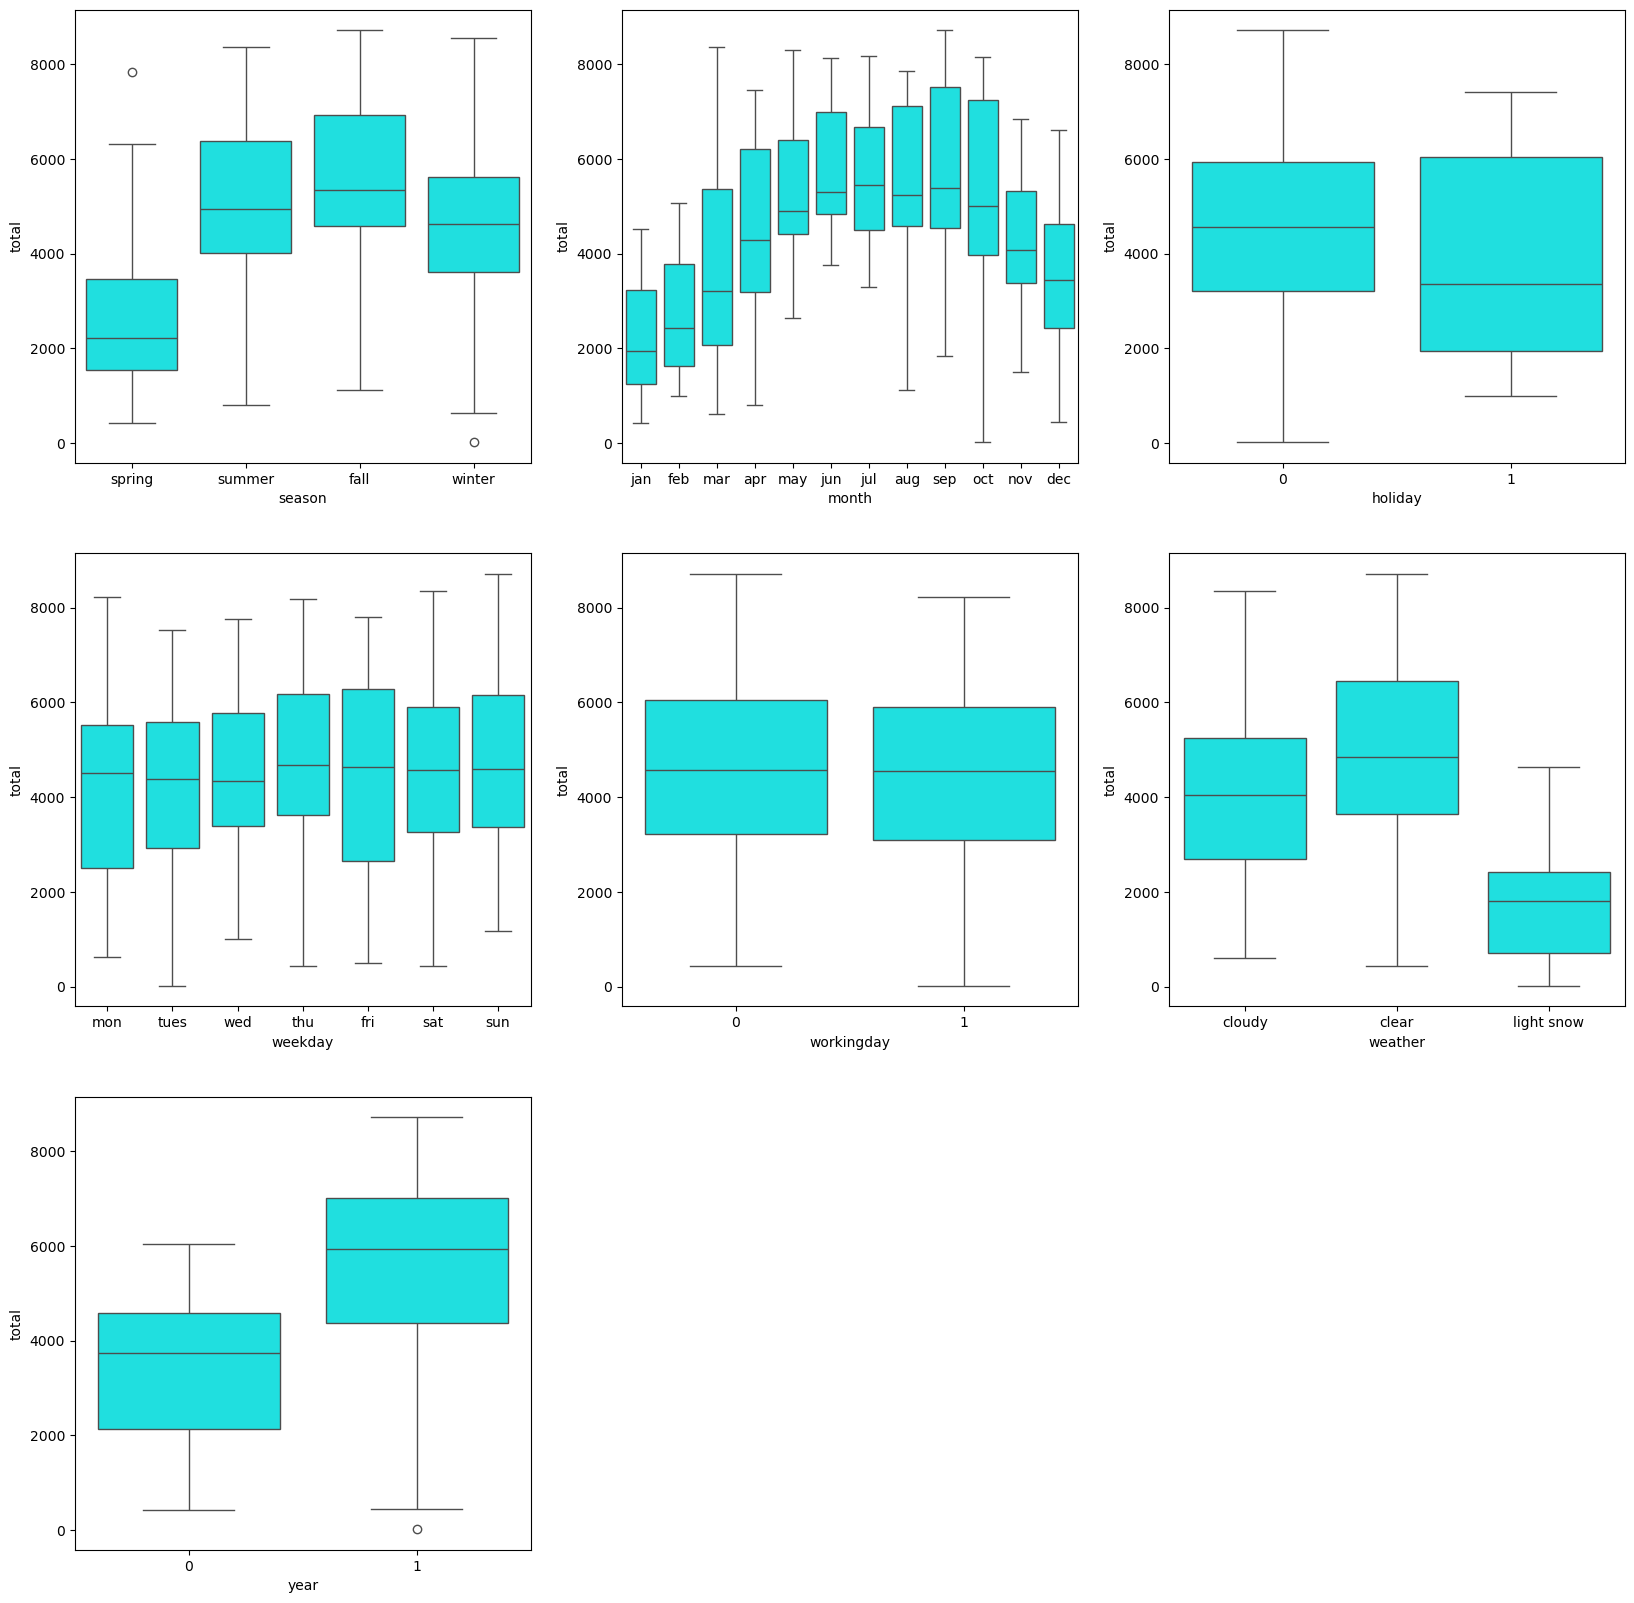

In [42]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(data=data,x='season',y='total',color='cyan')
plt.subplot(3,3,2)
sns.boxplot(data=data,x='month',y='total',color='cyan')
plt.subplot(3,3,3)
sns.boxplot(data=data,x='holiday',y='total',color='cyan')
plt.subplot(3,3,4)
sns.boxplot(data=data,x='weekday',y='total',color='cyan')
plt.subplot(3,3,5)
sns.boxplot(data=data,x='workingday',y='total',color='cyan')
plt.subplot(3,3,6)
sns.boxplot(data=data,x='weather',y='total',color='cyan')
plt.subplot(3,3,7)
sns.boxplot(data=data,x='year',y='total',color='cyan')
plt.show()

season : Almost 32% of the bike booking were happening in season fall with a median of over 5000 booking (for the period of 2 years). This was followed by summer and winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

• month: Almost 10% of the bike booking were happening in the months may, june, july, august, september with a median of over 4000 booking per month. This indicates, month has some trend for bookings and can be a good predictor for the dependent variable.

• weather: Almost 67% of the bike booking were happening during clear weather with a median of close to 5000 booking (for the period of 2 years). This was followed by cloudy weather with 30% of total booking. This indicates, weather does show some trend towards the bike bookings can be a good predictor for the dependent variable.

• holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

• weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

• workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

• year: As we can see in year 1 that is in 2019 company for the huge demand for the bikes as compare to year 0 that is 2018

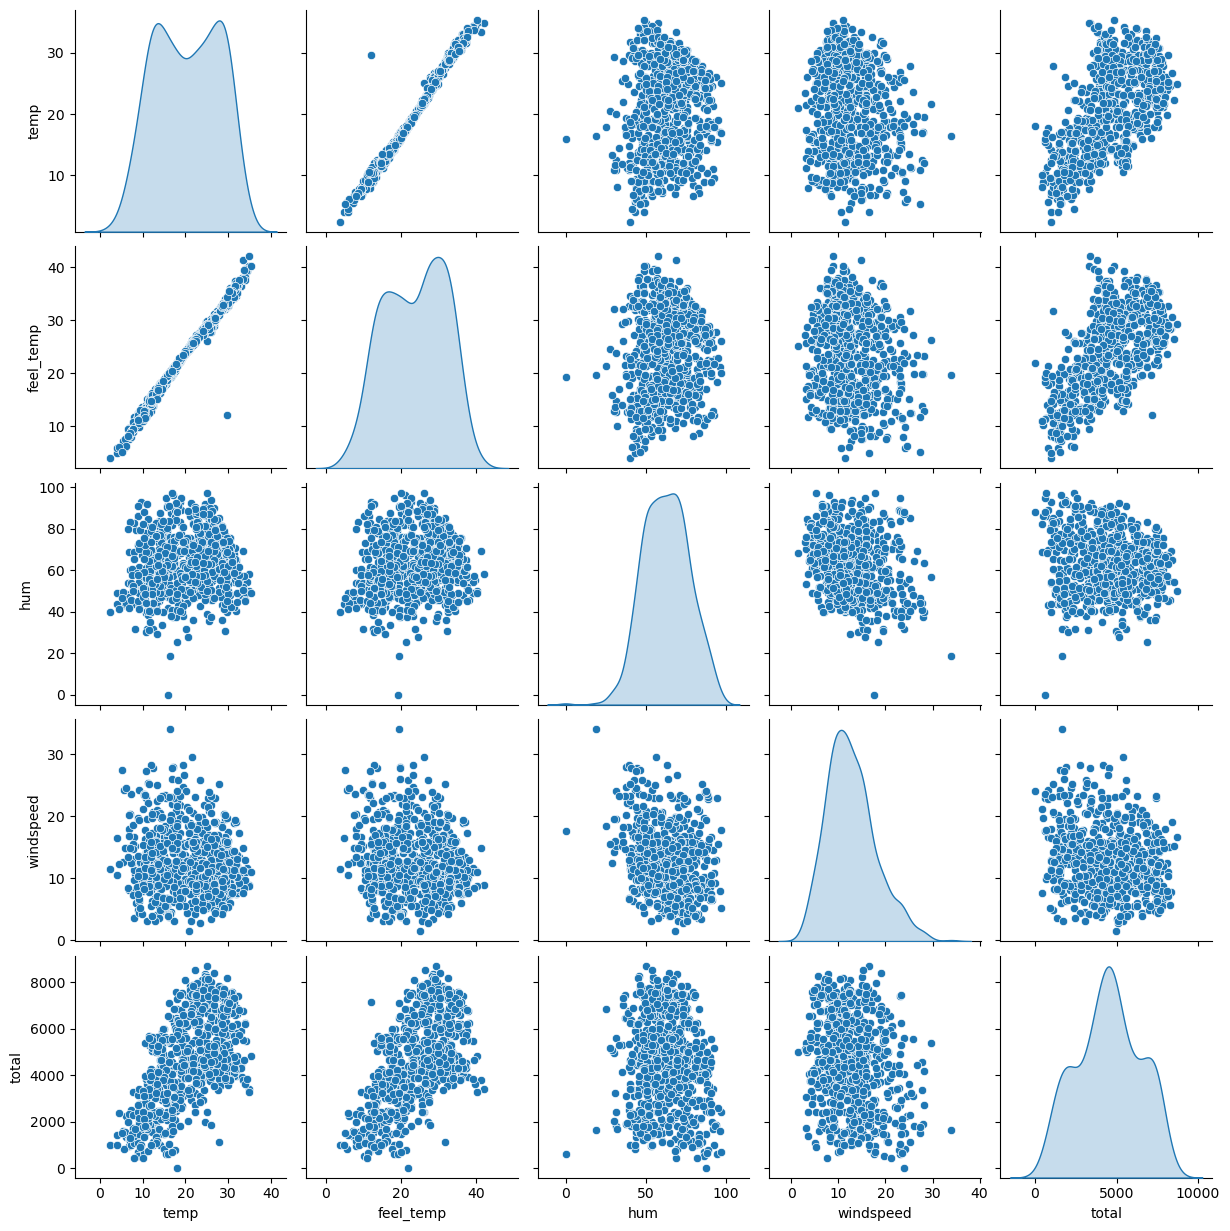

In [44]:
pair_var = ['temp','feel_temp','hum','windspeed','total']
sns.pairplot(data[pair_var],diag_kind='kde')
plt.show()

#### The above Pair-Plot tells us that there is a LINEAR RELATION between ‘temp’,‘atemp’ and ‘count’

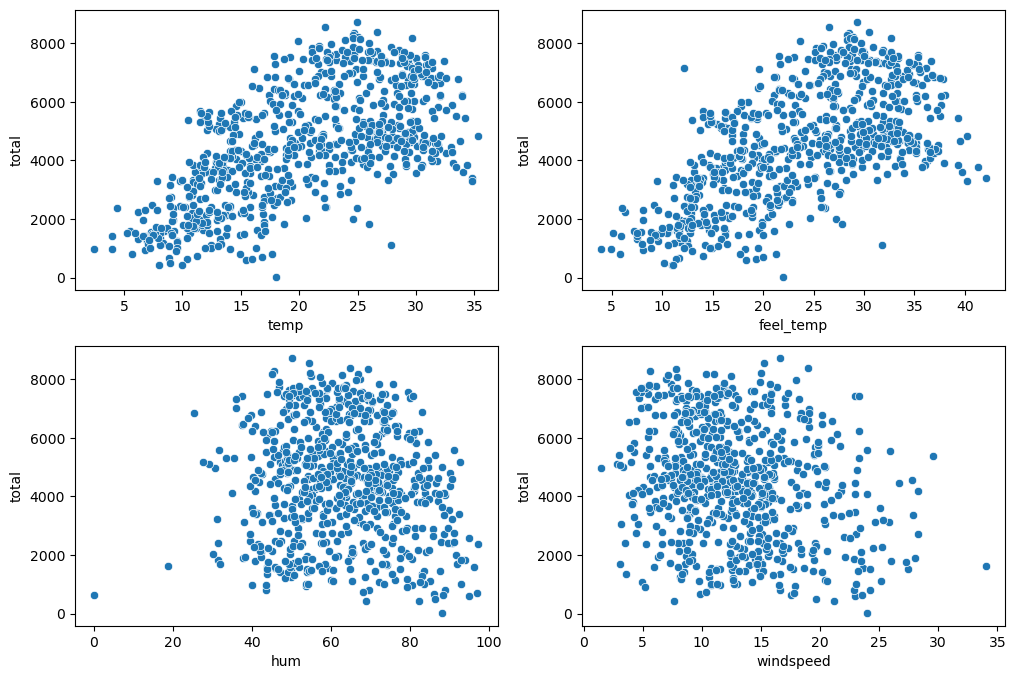

In [46]:
#scatter plot of the numerical variables
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.scatterplot(data=data,x='temp',y='total')
plt.subplot(2,2,2)
sns.scatterplot(data=data,x='feel_temp',y='total')
plt.subplot(2,2,3)
sns.scatterplot(data=data,x='hum',y='total')
plt.subplot(2,2,4)
sns.scatterplot(data=data,x='windspeed',y='total')
plt.show()

#### We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

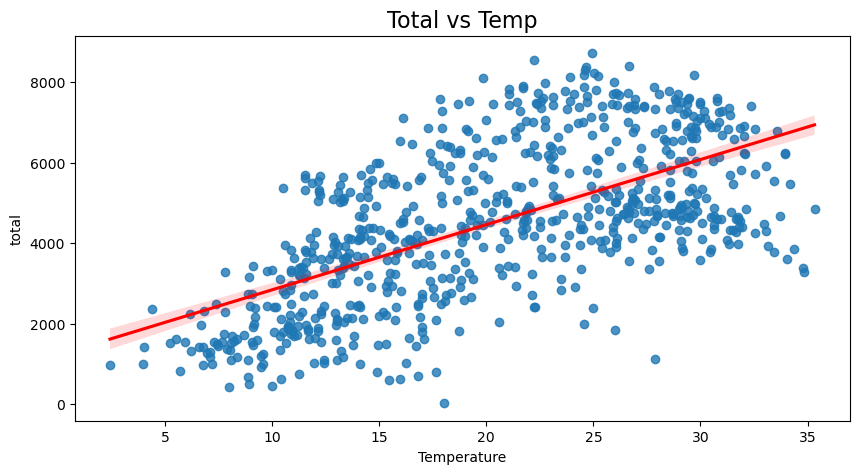

In [48]:
plt.figure(figsize=(10,5))
plt.title("Total vs Temp",fontsize=16)
sns.regplot(data=data,y="total",x="temp",line_kws=dict(color="r"))
plt.xlabel("Temperature")
plt.show()

#### Observations:
- Demand for bikes is positively correlated to temp.
- We can see that total is linearly increasing with temp indicating linear relation.

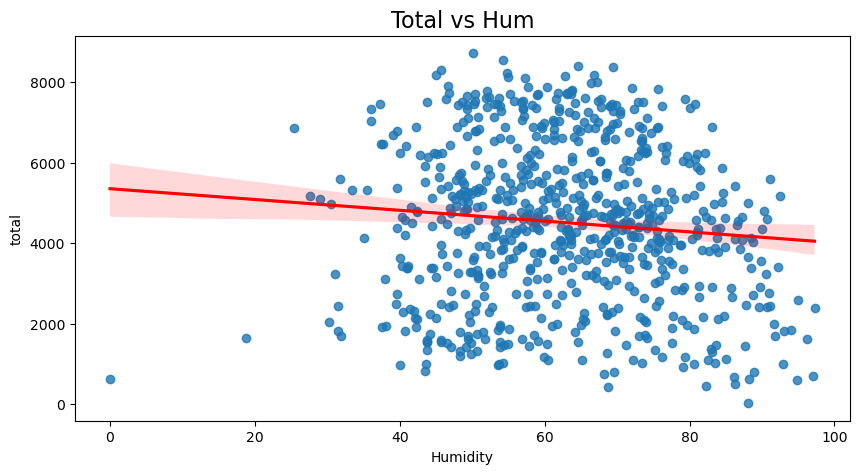

In [50]:
plt.figure(figsize=(10,5))
plt.title("Total vs Hum",fontsize=16)
sns.regplot(data=data,y="total",x="hum",line_kws=dict(color="r"))
plt.xlabel("Humidity")
plt.show()

#### Observations:
- Hum is values are more scattered around.
- Although we can see total decreasing with increase in humidity.

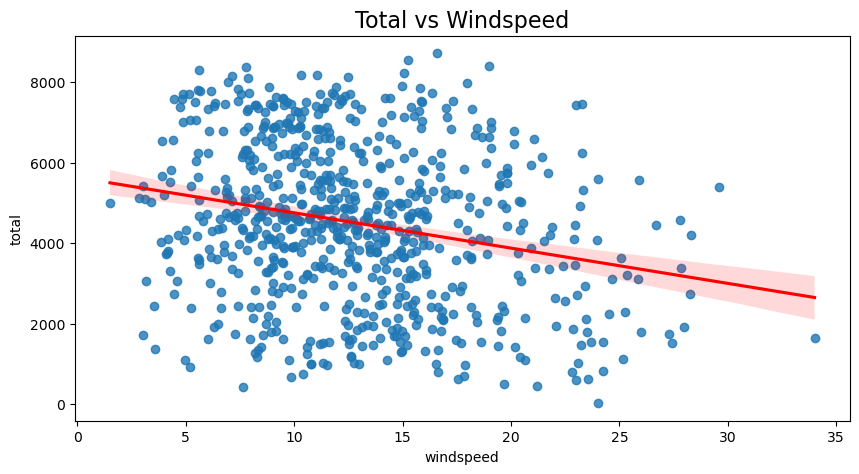

In [52]:
plt.figure(figsize=(10,5))
plt.title("Total vs Windspeed",fontsize=16)
sns.regplot(data=data,y="total",x="windspeed",line_kws=dict(color="r"))
plt.show()

#### Observations:
- Windspeed is values are more scattered around.
- Although we can see total decreasing with increase in windspeed.

In [54]:
corr_df = data[['temp','feel_temp','hum','windspeed','total']].corr()
corr_df

,temp,feel_temp,hum,windspeed,total
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
feel_temp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
total,0.627044,0.630685,-0.098543,-0.235132,1.000000


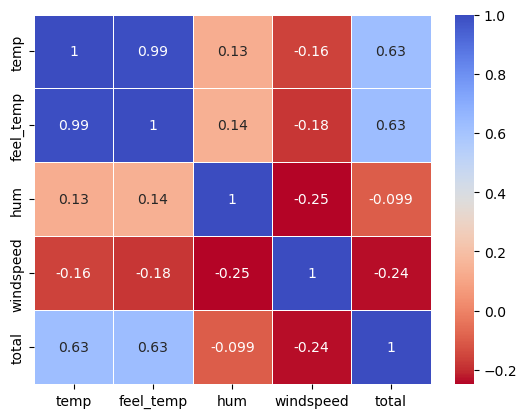

In [55]:
sns.heatmap(corr_df,cmap='coolwarm_r',linewidths=.5, annot = True)
plt.show()

#### The heatmap shows some useful insights:
- Correlation of Count(‘total’) with independent variables: - Total is highly (positively) correlated with ‘temp’.

- Total is negatively correlated to ‘windspeed’ (-0.24 approximately). This gives us an im-pression that the shared bikes demand will be somewhat less on windy days as compared to normal days.
  
- Correlation among independent variables: - Some of the independent variables are highly correlated (look at the top-left part of matrix): feet_temp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.
- Thus, while building the model, we’ll have to pay attention to multicollinearity.

### Data Preparation

#### Creating Dummy variables

In [59]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
data_new = pd.get_dummies(data, drop_first=True,dtype='int')

In [60]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   feel_temp           730 non-null    float64
 5   hum                 730 non-null    float64
 6   windspeed           730 non-null    float64
 7   total               730 non-null    int64  
 8   season_spring       730 non-null    int64  
 9   season_summer       730 non-null    int64  
 10  season_winter       730 non-null    int64  
 11  month_aug           730 non-null    int64  
 12  month_dec           730 non-null    int64  
 13  month_feb           730 non-null    int64  
 14  month_jan           730 non-null    int64  
 15  month_jul           730 non-null    int64  
 16  month_ju

In [61]:
print(data.shape) # shape without dummy variables
print(data_new.shape) # shape with dummy variables

(730, 12)
(730, 30)


In [62]:
data_new.head()

,year,holiday,workingday,temp,feel_temp,hum,windspeed,total,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weather_cloudy,weather_light snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### lets check the corelation of the variables of the data after creating dummy variables

In [64]:
data_new.corr()

,year,holiday,workingday,temp,feel_temp,hum,windspeed,total,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weather_cloudy,weather_light snow
year,1.000000e+00,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728,3.225068e-16,-1.751358e-17,-1.096204e-16,4.139281e-17,3.709668e-17,-2.801585e-16,5.516768e-17,1.465455e-16,-2.089634e-16,1.599112e-16,7.671648e-17,-2.983215e-17,8.571788e-17,-2.138778e-17,-0.003904,-6.776953e-17,-1.310791e-16,-1.642568e-17,0.003904,-2.848931e-16,-0.005796,-0.073758
holiday,8.195345e-03,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,3.464187e-02,-2.440810e-02,1.678505e-02,-5.243172e-02,6.362682e-03,1.198013e-02,3.575989e-02,6.362682e-03,-5.150208e-02,-5.243172e-02,6.362682e-03,6.785194e-02,6.362682e-03,8.174933e-03,-0.070541,-4.670117e-02,-2.325423e-02,-4.670117e-02,0.046228,1.877683e-01,-0.018668,-0.029619
workingday,-1.185197e-02,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640,-2.250665e-02,1.340523e-02,1.453809e-02,2.332432e-02,-1.918942e-02,-7.381624e-03,2.067449e-03,2.067449e-03,-4.581199e-03,2.067449e-03,1.269588e-02,-4.581199e-03,1.269588e-02,-2.615717e-02,0.274469,-6.086821e-01,-6.086821e-01,2.644637e-01,0.232252,1.796922e-01,-0.061689,0.044340
temp,4.878919e-02,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044,-6.194080e-01,1.548756e-01,-2.255900e-01,3.546479e-01,-2.856645e-01,-3.106261e-01,-4.315050e-01,4.327222e-01,3.083139e-01,-1.749229e-01,1.651884e-01,-2.066901e-01,-1.761584e-02,1.977294e-01,-0.036300,1.589260e-02,-1.217888e-02,2.298426e-02,-0.022016,4.621417e-03,-0.096297,-0.058461
feel_temp,4.721519e-02,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685,-6.247724e-01,1.631513e-01,-2.056343e-01,3.309389e-01,-2.774839e-01,-3.108452e-01,-4.390064e-01,4.293501e-01,3.007681e-01,-1.731348e-01,1.704469e-01,-1.968773e-01,-4.775183e-03,1.924774e-01,-0.032975,6.275102e-03,-1.200770e-02,2.526139e-02,-0.017836,5.041754e-03,-0.092933,-0.064937
hum,-1.125471e-01,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543,-1.848840e-01,-2.870035e-03,1.639076e-01,2.158033e-02,8.220022e-02,-1.305206e-01,-8.955482e-02,-6.375685e-02,-1.090477e-01,-8.388743e-02,1.312731e-01,-5.837193e-03,1.415566e-01,1.831181e-01,-0.006715,-3.441916e-02,-3.517182e-02,2.537781e-03,0.025340,1.966562e-02,0.490628,0.267592
windspeed,-1.162435e-02,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,1.788801e-01,9.742067e-02,-1.356120e-01,-6.912465e-02,-5.461552e-02,9.609291e-02,6.211669e-02,-9.608996e-02,-1.962363e-02,1.265752e-01,-2.953449e-02,-2.587339e-02,-6.013274e-02,-9.482530e-02,0.021537,2.391406e-03,4.782253e-03,-3.228996e-02,0.012442,-7.328425e-03,-0.037177,0.117332
total,5.697285e-01,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000,-5.617018e-01,1.453245e-01,6.461909e-02,1.821001e-01,-1.738782e-01,-2.738478e-01,-3.671673e-01,1.662362e-01,1.955684e-01,-1.284558e-01,1.325529e-01,-4.034360e-02,1.088461e-01,1.946635e-01,-0.052581,2.500442e-02,3.322694e-02,3.867215e-02,-0.049471,-1.328226e-02,-0.170686,-0.240602
season_spring,3.225068e-16,0.034642,-0.022507,-0.619408,-0.624772,-0.184884,0.178880,-0.561702,1.000000e+00,-3.320989e-01,-3.248593e-01,-1.742860e-01,7.652343e-02,5.038592e-01,5.325406e-01,-1.742860e-01,-1.711958e-01,2.817311e-01,-1.742860e-01,-1.711958e-01,-1.742860e-01,-1.711958e-01,0.010049,3.238560e-03,3.238560e-03,-1.494720e-02,0.010049,-5.854320e-03,0.029198,-0.022400
season_summer,-1.751358e-17,-0.024408,0.013405,0.154876,0.163151,-0.002870,0.097421,0.145325,-3.320989e-01,1.000000e+00,-3.296500e-01,-1.768562e-01,-1.768562e-01,-1.673311e-01,-1.768562e-01,-1.768562e-01,2.857575e-01,7.211912e-02,5.248014e-01,-1.737204e-01,-1.768562e-01,-1.737204e-01,-0.004187,-1.928926e-03,-1.928926e-03,7.097458e-03,-0.004187,7.097458e

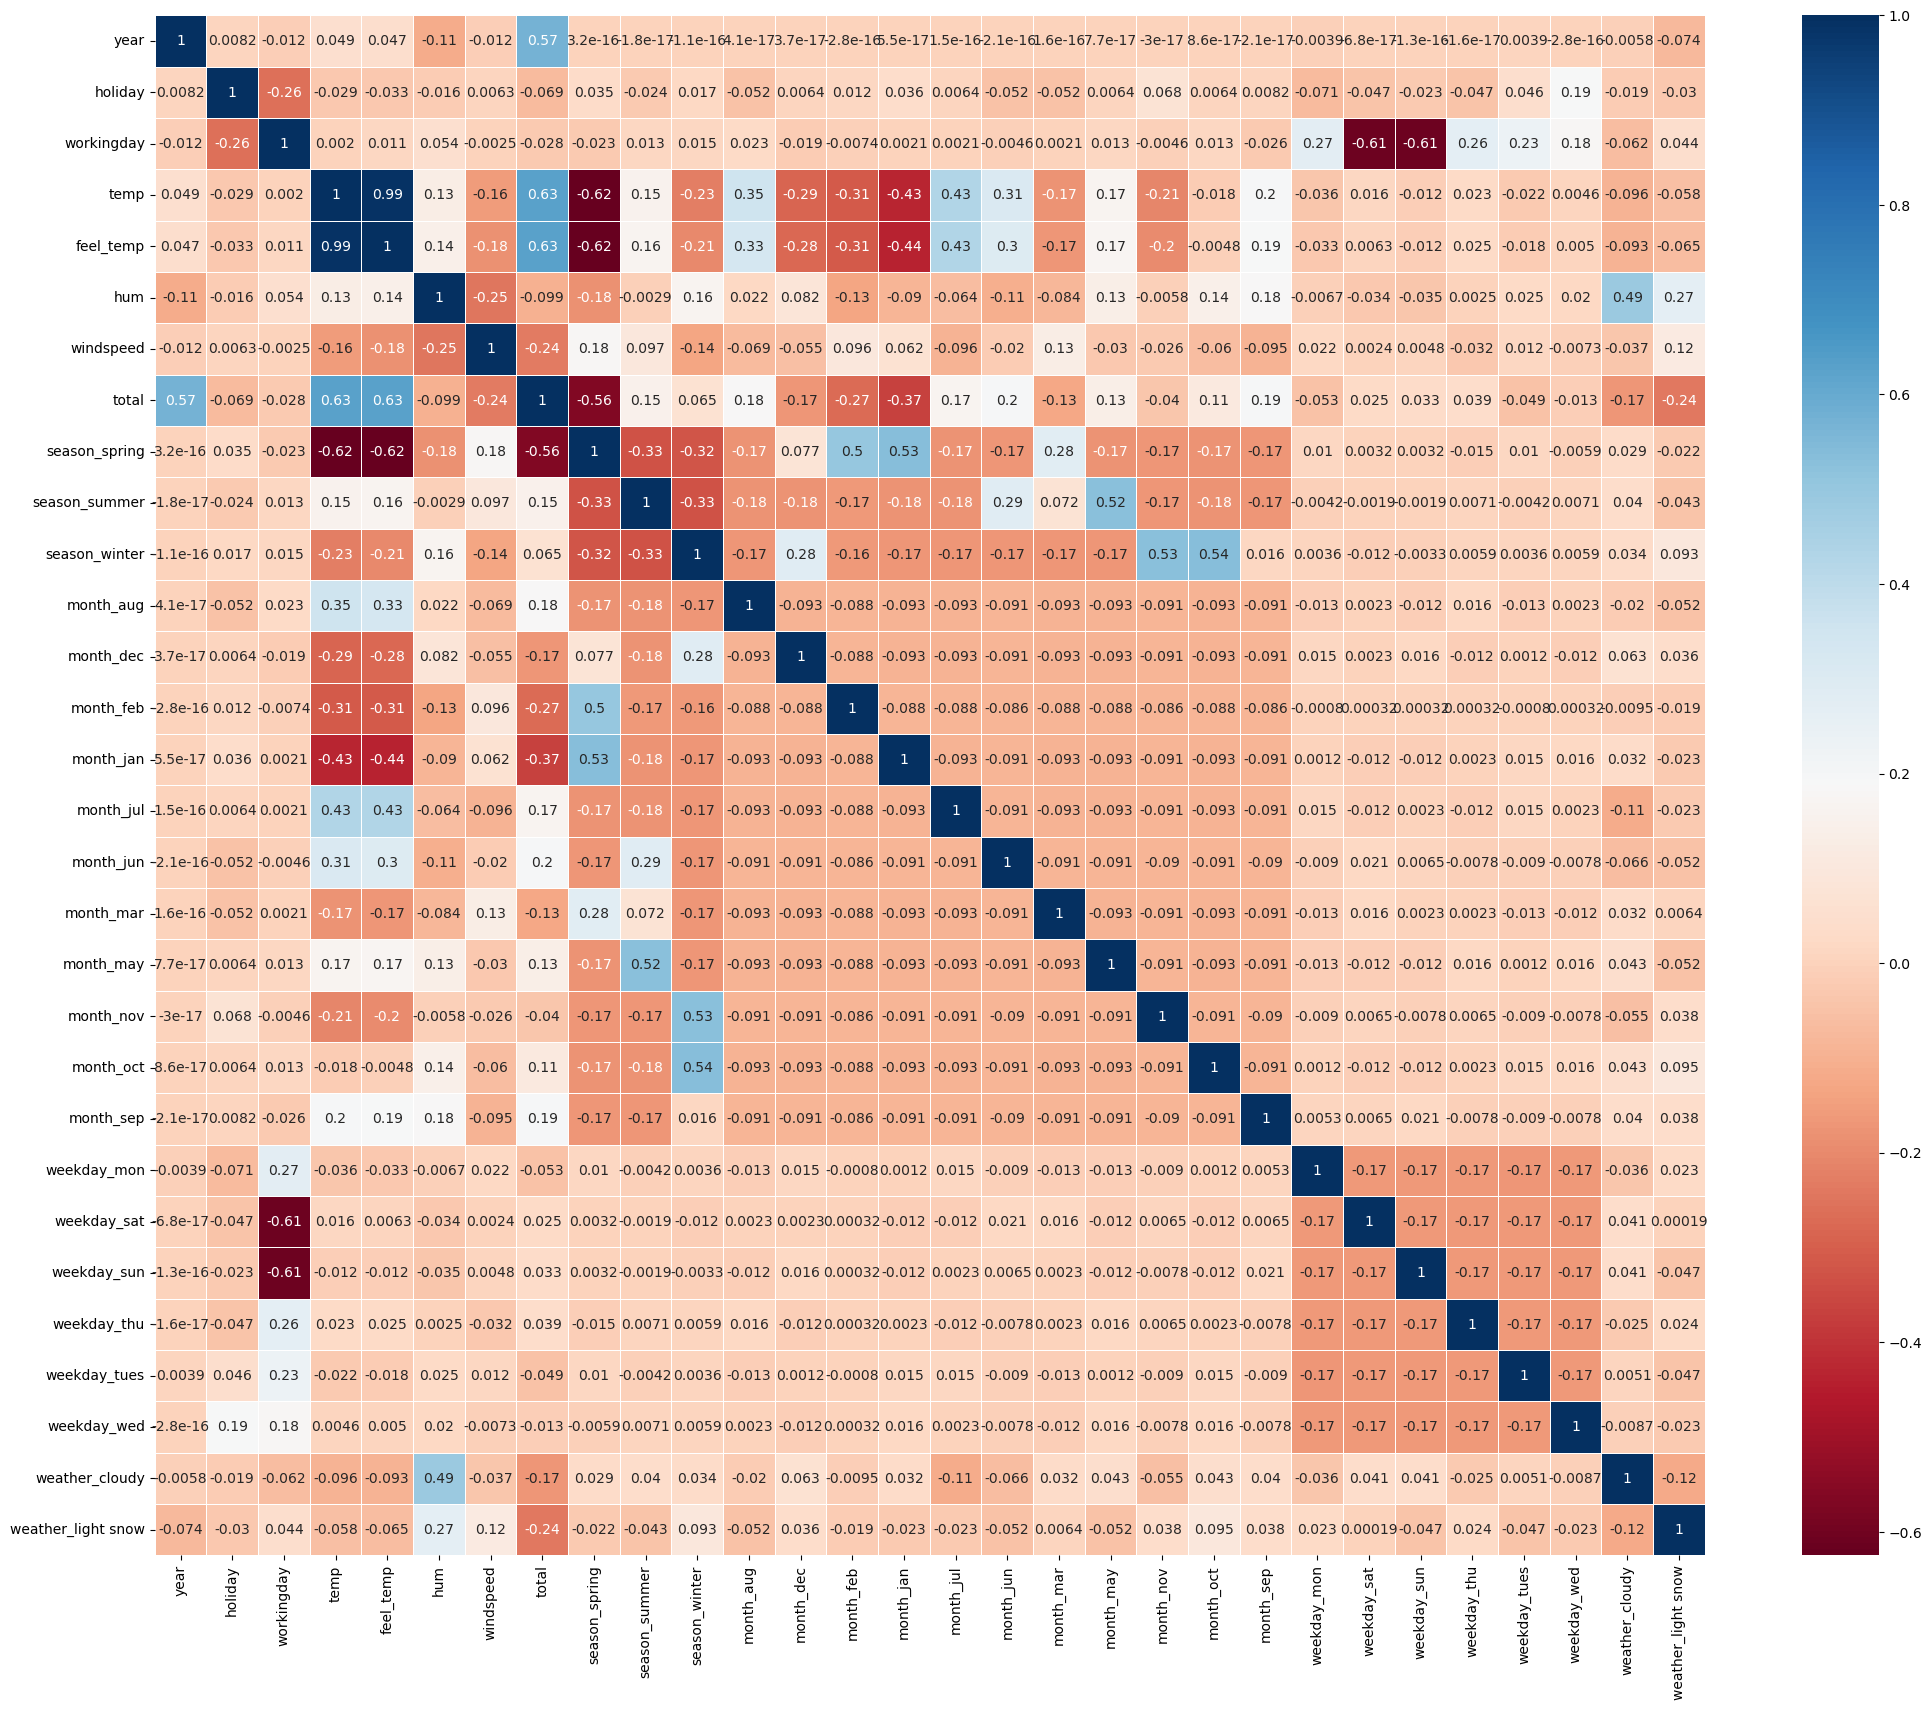

In [65]:
# Let's check the correlation coefficients to see which variables are highly correlated. 
# Note:
# here we are considering only those variables (dataframe: data_new) that were chosen for analysis
plt.figure(figsize = (25,20))
sns.heatmap(data_new.corr(), annot = True, cmap="RdBu",linewidths=0.5)
plt.show()

#### Observations:
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to
select/eliminate from the model.

#### Splitting the data into train and test sets
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [68]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [69]:
print(data_new.shape)
print(df_train.shape)
print(df_test.shape)

(730, 30)
(510, 30)
(219, 30)


In [70]:
df_train.head()

,year,holiday,workingday,temp,feel_temp,hum,windspeed,total,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weather_cloudy,weather_light snow
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


###  Rescaling the Features

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scale_var = ['temp','feel_temp','hum','windspeed','total']
df_train[scale_var] = scaler.fit_transform(df_train[scale_var])

In [75]:
df_train.head()

,year,holiday,workingday,temp,feel_temp,hum,windspeed,total,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weather_cloudy,weather_light snow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [76]:
df_train.describe()

,year,holiday,workingday,temp,feel_temp,hum,windspeed,total,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weather_cloudy,weather_light snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


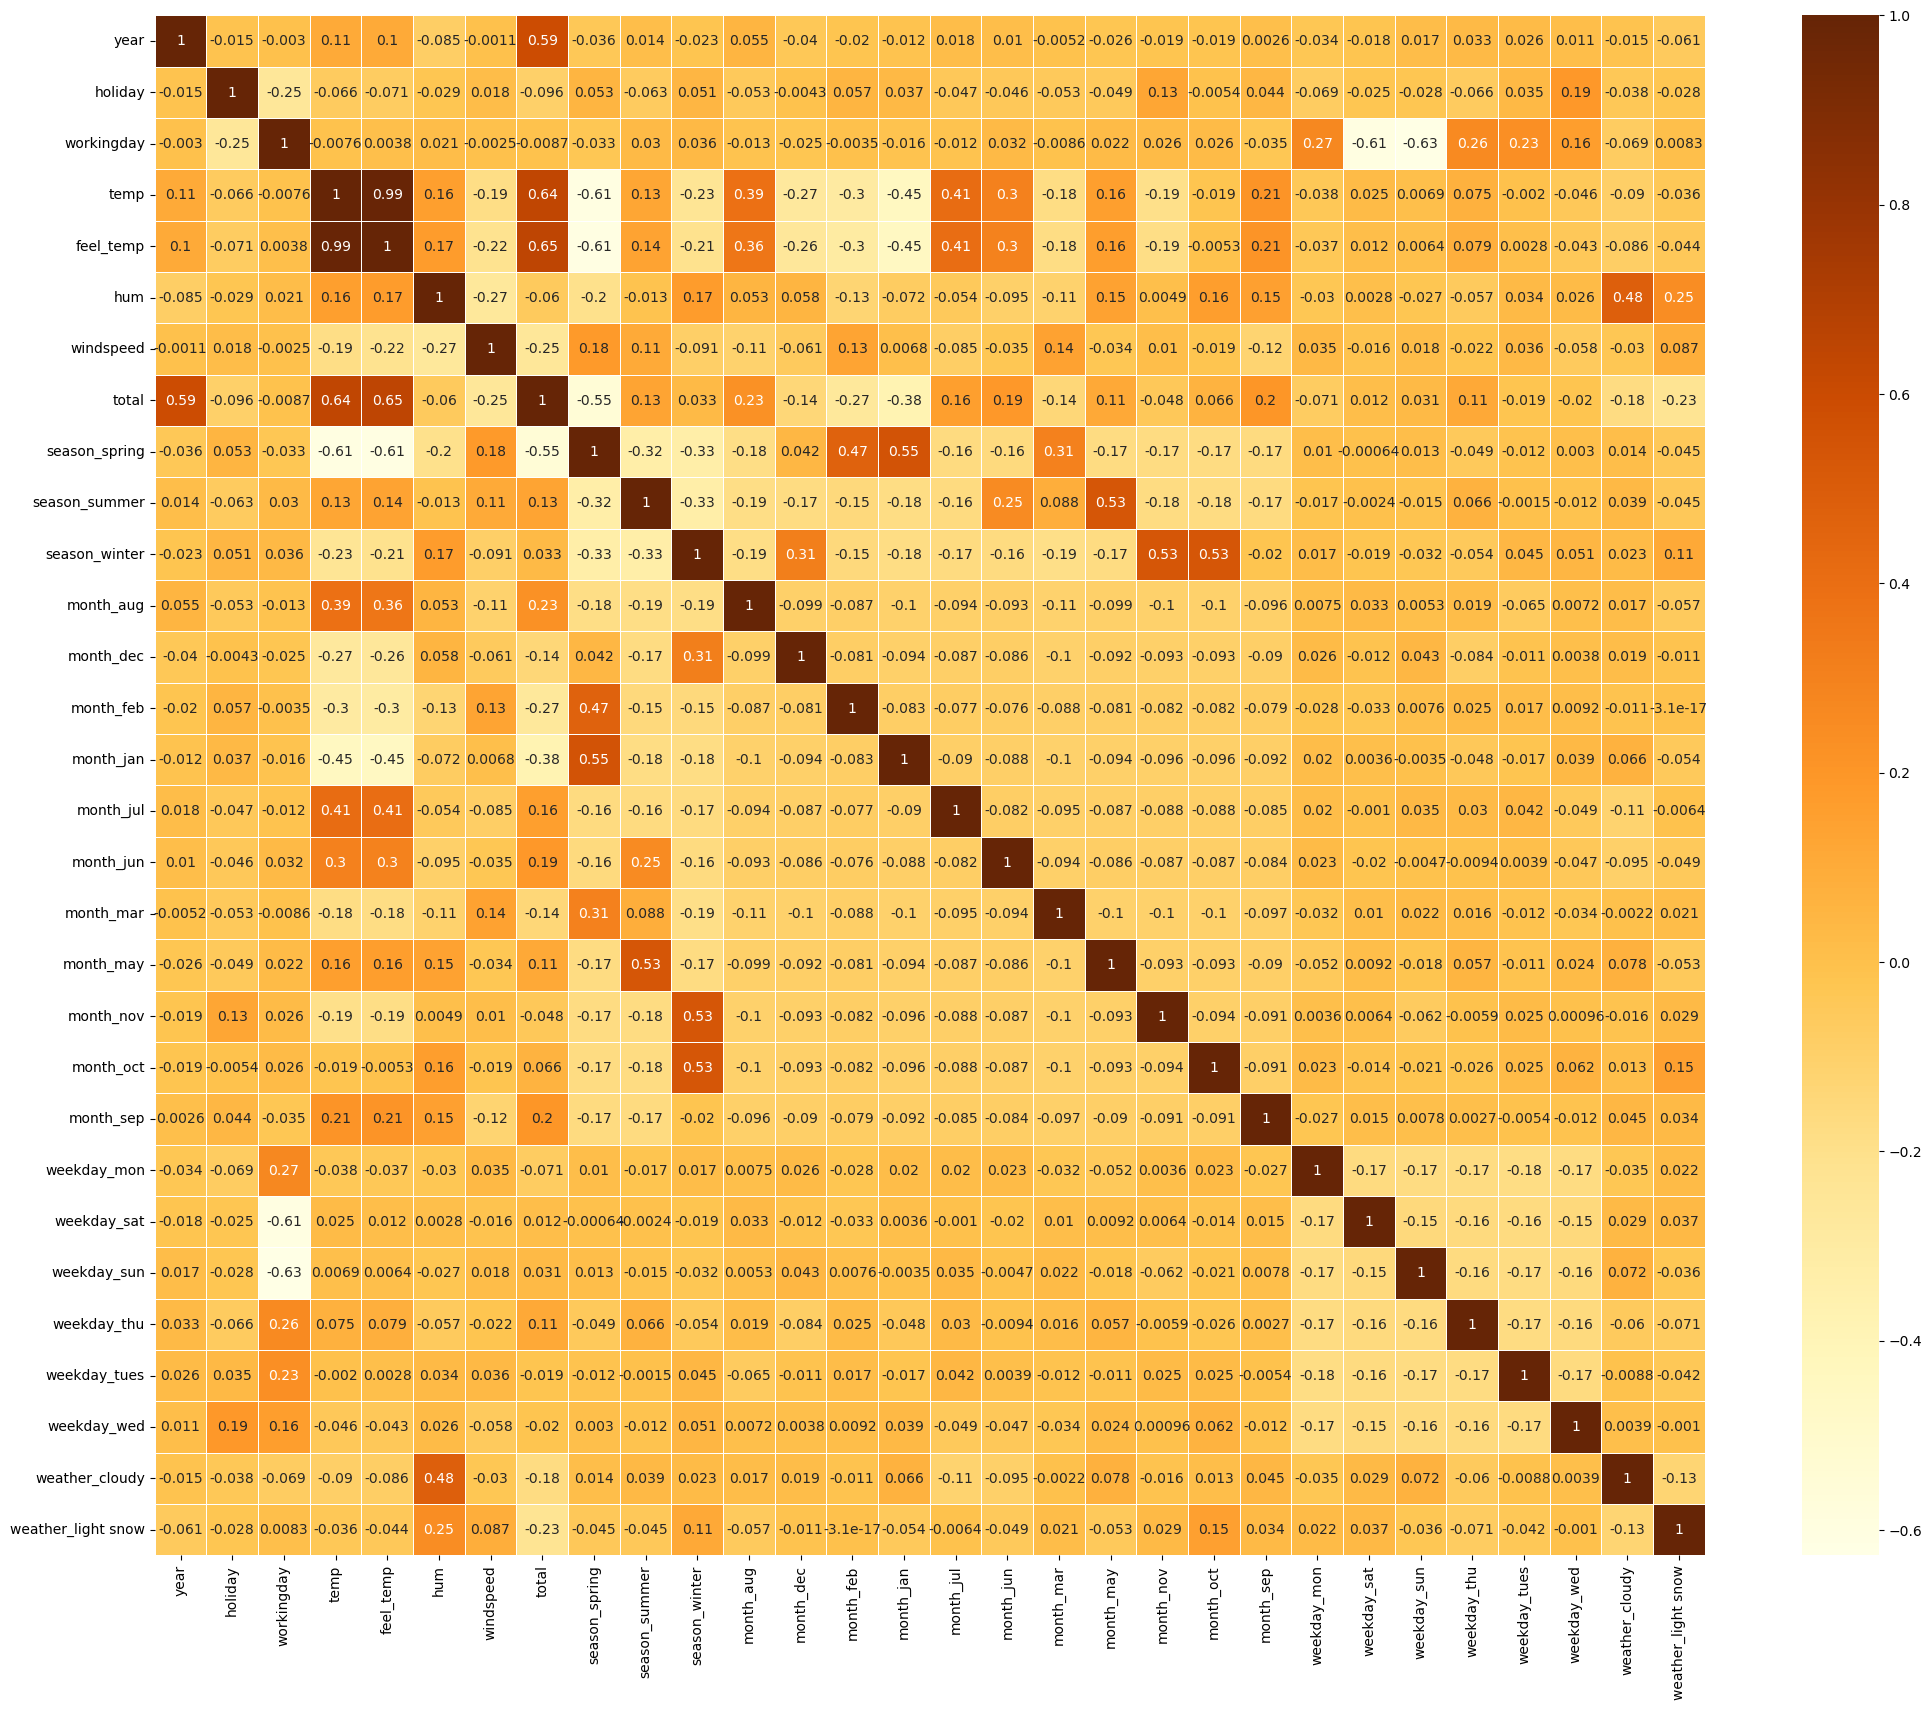

In [77]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlOrBr",linewidths=0.5)
plt.show()

## Building linear model

### Dividing into X and y sets for the model building

In [79]:
y_train = df_train.pop('total')
X_train = df_train

#### RFE Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [81]:
#importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [82]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [83]:
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('feel_temp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 10),
 ('month_dec', True, 1),
 ('month_feb', False, 2),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 7),
 ('month_nov', True, 1),
 ('month_oct', False, 12),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tues', False, 8),
 ('weekday_wed', False, 11),
 ('weather_cloudy', True, 1),
 ('weather_light snow', True, 1)]

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_dec', 'month_jan', 'month_jul',
       'month_nov', 'month_sep', 'weather_cloudy', 'weather_light snow'],
      dtype='object')

In [86]:
# columns which not support rfe
X_train.columns[~rfe.support_]

Index(['workingday', 'feel_temp', 'month_aug', 'month_feb', 'month_jun',
       'month_mar', 'month_may', 'month_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tues', 'weekday_wed'],
      dtype='object')

In [87]:
# Creating X_train dataframe with RFE selected variable
X_train_rfe = X_train[col]

In [88]:
# importing statsmodel
import statsmodels.api as sm
# Adding constant variable
X_train_rfe_1 = sm.add_constant(X_train_rfe)
# Creating and running the Linear Model
lrm_1 = sm.OLS(y_train,X_train_rfe_1).fit()


In [89]:
# Lets print the summry of the first Linear Regression model
print(lrm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          3.34e-189
Time:                        18:05:18   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3202      0

- This model has an Adjusted R-squared value of 84.1% which seems pretty good. But let’s see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.
- But let’s check for the multicollinearity among these variables.

## VIF check

In [92]:
# removing constant variable
a = X_train_rfe_1.drop(['const'], axis=1)
# import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weather_cloudy,2.32
0,year,2.09
11,month_nov,1.83
9,month_jan,1.75


### Building 2nd model
• RFE with 10 Features

In [94]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=10) #Running RFE
rfe = rfe.fit(X_train,y_train)

In [95]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('feel_temp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('month_aug', False, 15),
 ('month_dec', False, 6),
 ('month_feb', False, 7),
 ('month_jan', False, 4),
 ('month_jul', True, 1),
 ('month_jun', False, 19),
 ('month_mar', False, 20),
 ('month_may', False, 12),
 ('month_nov', False, 5),
 ('month_oct', False, 17),
 ('month_sep', True, 1),
 ('weekday_mon', False, 14),
 ('weekday_sat', False, 9),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 18),
 ('weekday_tues', False, 13),
 ('weekday_wed', False, 16),
 ('weather_cloudy', False, 2),
 ('weather_light snow', True, 1)]

In [96]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'month_jul', 'month_sep', 'weather_light snow'],
      dtype='object')

In [97]:
X_train_rfe = X_train[col]

In [98]:
# Adding constant variable
X_train_rfe_2 = sm.add_constant(X_train_rfe)
# Creating and running the Linear Model
lrm_2 = sm.OLS(y_train,X_train_rfe_2).fit()
# Lets print the summry of the first Linear Regression model
print(lrm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          1.53e-184
Time:                        18:05:18   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3769      0

Note that the new model built on the selected features doesn’t show much dip in the accuracy in comparison to the model which was built on 15 features. It has gone from 84.1% to 82.6%. This is indeed a good indication to proceed with these selected features. But let’s check for the multicollinearity among these variables.

In [100]:
# removing constant variable
a = X_train_rfe_2.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,year,2.06
6,season_winter,1.98
7,month_jul,1.40
8,month_sep,1.20
9,weather_light snow,1.11
1,holiday,1.04


### Building 3rd model 
• RFE with 7 Features

In [102]:
#RFE with 7 Features
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=7)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [103]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('feel_temp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', False, 3),
 ('month_aug', False, 18),
 ('month_dec', False, 9),
 ('month_feb', False, 10),
 ('month_jan', False, 7),
 ('month_jul', True, 1),
 ('month_jun', False, 22),
 ('month_mar', False, 23),
 ('month_may', False, 15),
 ('month_nov', False, 8),
 ('month_oct', False, 20),
 ('month_sep', False, 4),
 ('weekday_mon', False, 17),
 ('weekday_sat', False, 12),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 21),
 ('weekday_tues', False, 16),
 ('weekday_wed', False, 19),
 ('weather_cloudy', False, 5),
 ('weather_light snow', True, 1)]

In [104]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'temp', 'hum', 'windspeed', 'season_spring', 'month_jul',
       'weather_light snow'],
      dtype='object')

In [105]:
X_train_rfe = X_train[col]

In [106]:
# Adding constant variable
X_train_rfe_3 = sm.add_constant(X_train_rfe)
X_train_rfe_3 = sm.add_constant(X_train_rfe)
# Creating and running the Linear Model
lrm_3 = sm.OLS(y_train,X_train_rfe_3).fit()
lrm_3 = sm.OLS(y_train,X_train_rfe_3).fit()
# Lets print the summry of the first Linear Regression model
print(lrm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          2.34e-178
Time:                        18:05:18   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4277      0

let’s check for the multicollinearity among these variables.

In [108]:
# removing constant variable
a = X_train_rfe_3.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,year,2.03
4,season_spring,1.80
5,month_jul,1.35
6,weather_light snow,1.11


From the model summary above, all the variables have p-value < 0.05 and from the p-value per- spective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.
So let’s try removing ‘hum’ first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [110]:
# Let's drop the 'hum' column
X_train_rfe.drop("hum",axis=1,inplace=True)
X_train_rfe

,year,temp,windspeed,season_spring,month_jul,weather_light snow
653,1,0.509887,0.300794,0,0,0
576,1,0.815169,0.264686,0,1,0
426,1,0.442393,0.255342,1,0,0
728,1,0.245101,0.663106,1,0,0
482,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...
526,1,0.824514,0.355596,0,0,0
578,1,0.863973,0.187140,0,0,0
53,0,0.202618,0.111379,1,0,0
350,0,0.248216,0.431816,0,0,0


In [111]:
# Adding constant variable
X_train_rfe_4 = sm.add_constant(X_train_rfe)
# Creating and running the Linear Model
lrm_4 = sm.OLS(y_train,X_train_rfe_4).fit()
# Lets print the summry of the first Linear Regression model
print(lrm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          1.37e-168
Time:                        18:05:18   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2596      0

The model seems to be doing a good job. Let’s also quickly take a look at the VIF values.

In [113]:
# removing constant variable
a = X_train_rfe_4.drop(['const'], axis=1)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,year,2.03
3,season_spring,1.49
4,month_jul,1.26
5,weather_light snow,1.04


- All the VIF values and p-values seem to be in the permissible range now. Also the Adjusted R-squared value has dropped from 84.1% with 15 variables to just 79.1% using 6 variables. This model is explaining most of the variance without being too complex. So let’s proceed with this model. 
- For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Residual Analysis

Before we make predictions on the test set, let’s first analyse the residuals.

In [117]:
y_train_predict = lrm_4.predict(X_train_rfe_4)

Text(0.5, 0, 'Errors')

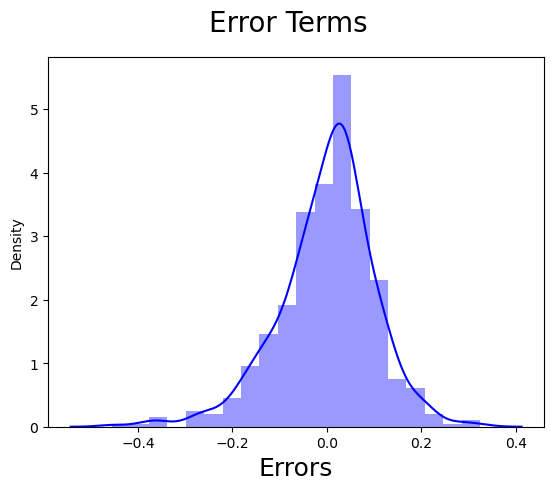

In [118]:
res = y_train - y_train_predict
# plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((res),bins = 20,color='blue')
fig.suptitle('Error Terms', fontsize = 20)    # Plot heading
plt.xlabel('Errors', fontsize = 18)           # X-label

#### The error terms are fairly normally distributed and we can surely live with this. Let’s now make predictions on the test-set.

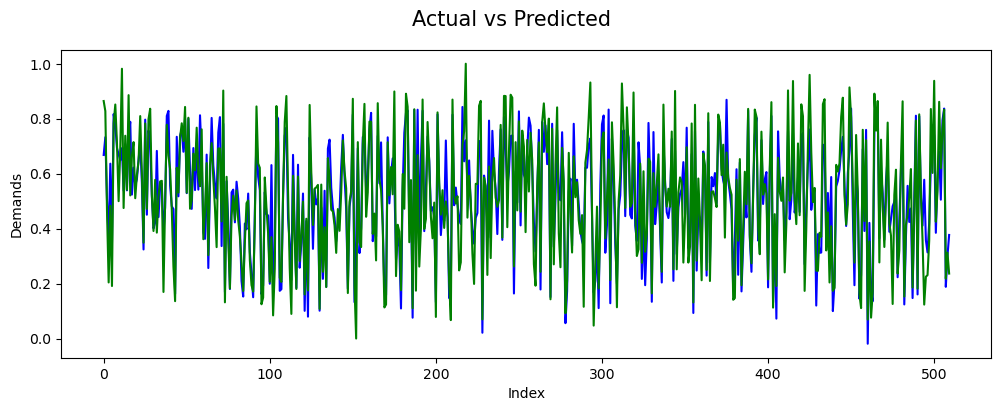

In [120]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
fig = plt.figure(figsize=(12,4))
plt.plot(c,y_train_predict, color='blue')
plt.plot(c,y_train, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

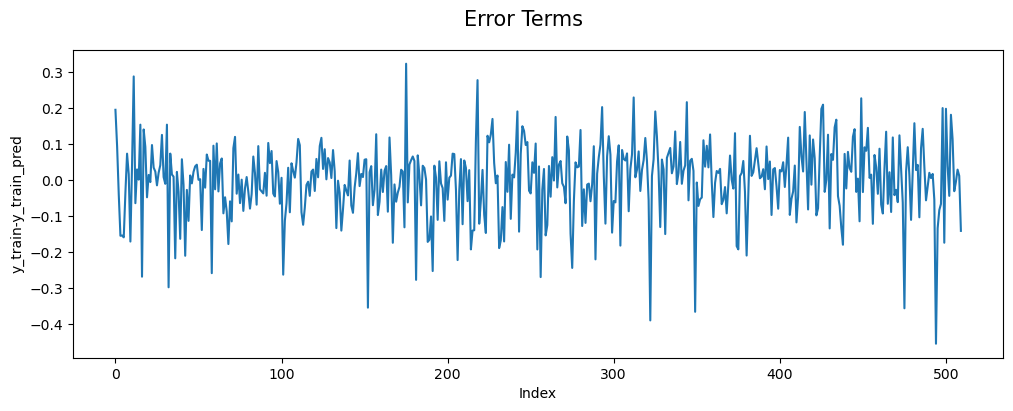

In [122]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
fig = plt.figure(figsize=(12,4))
plt.plot(c,y_train-y_train_predict)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other

### Linearity Check

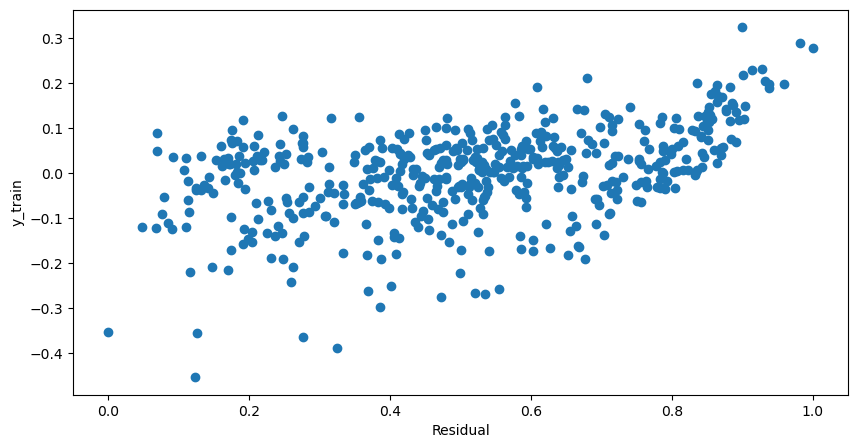

In [125]:
# scatter plot for the check
residual = (y_train - y_train_predict)
fig = plt.figure(figsize=(10,5))
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Making Prediction
#### We would first need to scale the test set as well. So let’s start with that.

In [127]:
X_train_rfe_4

,const,year,temp,windspeed,season_spring,month_jul,weather_light snow
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [128]:
# let's recall the set of variables which are to be scaled
scale_var

['temp', 'feel_temp', 'hum', 'windspeed', 'total']

In [129]:
df_test[scale_var] = scaler.transform(df_test[scale_var])

In [130]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('total')
X_test = df_test

In [131]:
# Let's check the list of 6 variables RFE had selected
test_col = X_train_rfe.columns

In [132]:
X_test = X_test[test_col]

In [133]:
X_test.head()

,year,temp,windspeed,season_spring,month_jul,weather_light snow
184,0,0.831783,0.084219,0,1,0
535,1,0.901354,0.153728,0,0,0
299,0,0.511964,0.334206,0,0,0
221,0,0.881625,0.339570,0,0,0
152,0,0.817246,0.537414,0,0,0


In [134]:
# Add a constant to the test set created
X_test_rfe = sm.add_constant(X_test)

In [135]:
# Making predictions
y_pred = lrm_4.predict(X_test_rfe)

<Figure size 640x480 with 0 Axes>

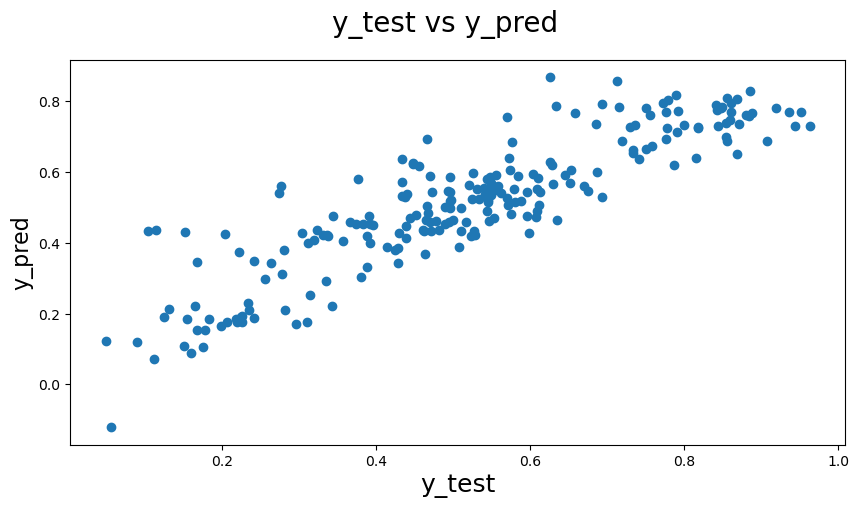

In [136]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading
plt.xlabel('y_test', fontsize=18) # X-label
plt.ylabel('y_pred', fontsize=16) # Y-label
plt.show()

#### From the above plot, it’s evident that the model is doing well on the test set as well. Let’s also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [138]:
# r2_score for 6 variables of test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228019

#### Thus, for the model with 6 variables, the r-squared on training and test data is about 79.3% and 78.02% respectively. The adjusted r-squared on the train set is about is about 79.1%.

In [140]:
# adjusted r2 for 6 variables of test data
r2 = 0.7802124353228018

# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7739920325489189

##  Final Result Comparison

#### Train R^2 :0.793 or 79.3%
####  Train Adjusted R^2 :0.791 or 79.1%
####  Test R^2 :0.7802 or 78.0 %
####  Test Adjusted R^2 :0.7739 or 77.39%
####  This seems to be a really good model that can very well ‘Generalize’ various datasets.


## Conclusion


#### As per our final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (temp) - A coeﬀicient value of ‘0.2360’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.2360 units.

- Weather_light snow - A coeﬀicient value of ‘-0.2413’ indicated that, w.r.t Weather_clear, a unit increase in Weather_light snow variable decreases the bike hire numbers by 0.2413 units.

- Year - A coeﬀicient value of ‘0.2360’ indicated that a unit increase in year variable increases the bike hire numbers by 0.2360 units. So, it’s suggested to consider these variables utmost importance while planning, to achive maximum Booking The next best features that can also be considered are - sea- son_spring: - A coeﬀicient value of ‘-0.1413’ indicated that w.r.t season_spring, a unit increase in season_spring variable decreases the bike hire numbers by 0.1413 units.
  
- windspeed: - A coeﬀicient value of ‘-0.1524’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1524 units.
  
#### Total Count = 0.2596 + 0.2360 year + 0.4279 * temp - 0.1524 * windspeed - 0.1413 * season_spring - 0.0715 * month_july - 0.2413 * weather_light_snow*